In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
import torch   

#handling text data
from torchtext.legacy import data  

In [5]:
dataset=pd.read_csv('/content/drive/MyDrive/data/dataset/Dataset 3.csv',encoding='ISO-8859-1')

In [6]:
import re
def remove(tweets):
    return re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", tweets)


In [7]:
dataset['tweets'] = dataset['tweets'].apply(lambda x: remove(x))


In [8]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression everyon...,1


In [9]:
dataset.drop(10313,inplace=True)

In [10]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10308,Many sufferers of depression aren't sad they f...,1
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [11]:
dataset.drop( dataset[dataset.tweets.str.len() < 5].index, inplace=True)

In [12]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10308,Many sufferers of depression aren't sad they f...,1
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [13]:
dataset.to_csv('data.csv',index=False)

In [14]:
#keras
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [15]:
dataset=pd.read_csv("data.csv")

In [16]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10305,Many sufferers of depression aren't sad they f...,1
10306,No Depression by G Herbo is my mood from now o...,1
10307,What do you do when depression succumbs the br...,1
10308,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [19]:
voc_size=5000
import nltk
import re
from nltk.corpus import stopwords

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataset)):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset['tweets'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [22]:

onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#onehot_repr

In [23]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  450 3314 4288]
 [   0    0    0 ...  697 4424 1819]
 [   0    0    0 ... 3793  679 4374]
 ...
 [   0    0    0 ... 4514  356  213]
 [   0    0    0 ... 1414 3562 4678]
 [   0    0    0 ... 4346 3045 2595]]


In [24]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(dataset.sentiment)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [26]:
import matplotlib.pyplot as plt


In [27]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [28]:
# define model
model2 = Sequential()
model2.add(Embedding(voc_size,40,input_length=sent_length))
model2.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=4, activation='tanh'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=1, activation='tanh'))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
print(model2.summary())
# compile network
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
conv1d (Conv1D)              (None, 13, 32)            10272     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 32)             4128      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 32)             1056      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 32)             0

In [29]:
history=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=88)

Epoch 1/10
79/79 [==============================] - 33s 13ms/step - loss: 0.4703 - accuracy: 0.8163 - val_loss: 0.3472 - val_accuracy: 0.8766
Epoch 2/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2384 - accuracy: 0.9267 - val_loss: 0.2287 - val_accuracy: 0.9298
Epoch 3/10
79/79 [==============================] - 1s 9ms/step - loss: 0.1580 - accuracy: 0.9554 - val_loss: 0.2382 - val_accuracy: 0.9259
Epoch 4/10
79/79 [==============================] - 1s 9ms/step - loss: 0.1213 - accuracy: 0.9674 - val_loss: 0.2388 - val_accuracy: 0.9292
Epoch 5/10
79/79 [==============================] - 1s 9ms/step - loss: 0.0995 - accuracy: 0.9734 - val_loss: 0.2682 - val_accuracy: 0.9230
Epoch 6/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0832 - accuracy: 0.9773 - val_loss: 0.2854 - val_accuracy: 0.9157
Epoch 7/10
79/79 [==============================] - 1s 9ms/step - loss: 0.0757 - accuracy: 0.9799 - val_loss: 0.3167 - val_accuracy: 0.9163
Epoch 8/10
79/79 [

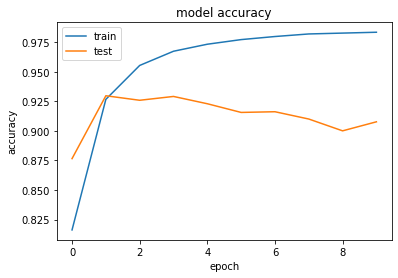

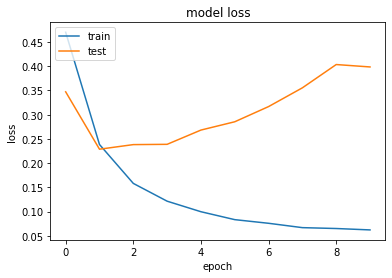

In [30]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_pred=np.round(model2.predict(X_test))

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9077284748751102

In [33]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.9077284748751102

In [34]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.9077284748751102

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrice = confusion_matrix(y_test,y_pred)
matrice

array([[2556,   95],
       [ 219,  533]])

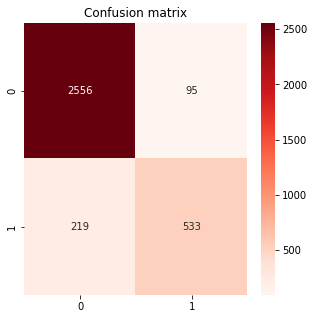

In [39]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrice,columns=[0,1],index=[0,1])
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Reds',)
plt.title(f"Confusion matrix")
plt.show()

In [40]:
classify_report = classification_report(y_test, y_pred, )
print(classify_report)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2651
           1       0.85      0.71      0.77       752

    accuracy                           0.91      3403
   macro avg       0.88      0.84      0.86      3403
weighted avg       0.91      0.91      0.90      3403

